# Task 4

## Build a Linear model for the given dataset with regularisation. Attempt to interpret the variable coefficients of the Linear Model.


In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [2]:
# Load Dataset

df = pd.read_csv("nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [ ]:
# seperate features and target

features = df.drop(["id","vendor_id","trip_duration","pickup_datetime","dropoff_datetime"],axis = 1)
target = df["trip_duration"]

In [3]:
# get dummies

new_df= pd.get_dummies(df.drop(["id","vendor_id","trip_duration","pickup_datetime","dropoff_datetime"],axis = 1))
new_df.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,1,-73.953918,40.778873,-73.963875,40.771164,1,0
1,2,-73.988312,40.731743,-73.994751,40.694931,1,0
2,2,-73.997314,40.721458,-73.948029,40.774918,1,0
3,6,-73.961670,40.759720,-73.956779,40.780628,1,0
4,1,-74.017120,40.708469,-73.988182,40.740631,1,0


In [4]:
# Seperate feature and target

x = new_df
y = df["trip_duration"]
print(x.shape)
y.shape

(729322, 7)


(729322,)

### Train and test the dataset for Linear Regression model

In [5]:
# split the model with train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=50)

In [6]:
#creating an instance of LR

LR = LinearRegression()
#fit the model

LR.fit(x_train,y_train)

LinearRegression()

In [7]:
# Predict train values and find there RMSE

predict_train = LR.predict(x_train)
K = sqrt(mse(predict_train,y_train))
print("RMSE of Training ",K)

RMSE of Training  4092.076898362519


In [9]:
# Predict test values and find there RMSE

predict_test = LR.predict(x_test)
K = sqrt(mse(predict_test,y_test))
print("RMSE of Testing",K)

RMSE of Testing 3051.3780136054074


In [10]:
# Compute coefficients of above model

LR.coef_

array([   35.50296735,  2545.38991874, -3429.38406012,  -742.69260615,
       -1781.0721256 ,   -51.5684571 ,    51.5684571 ])

Text(0.5, 1.0, 'Plot of Coefficient')

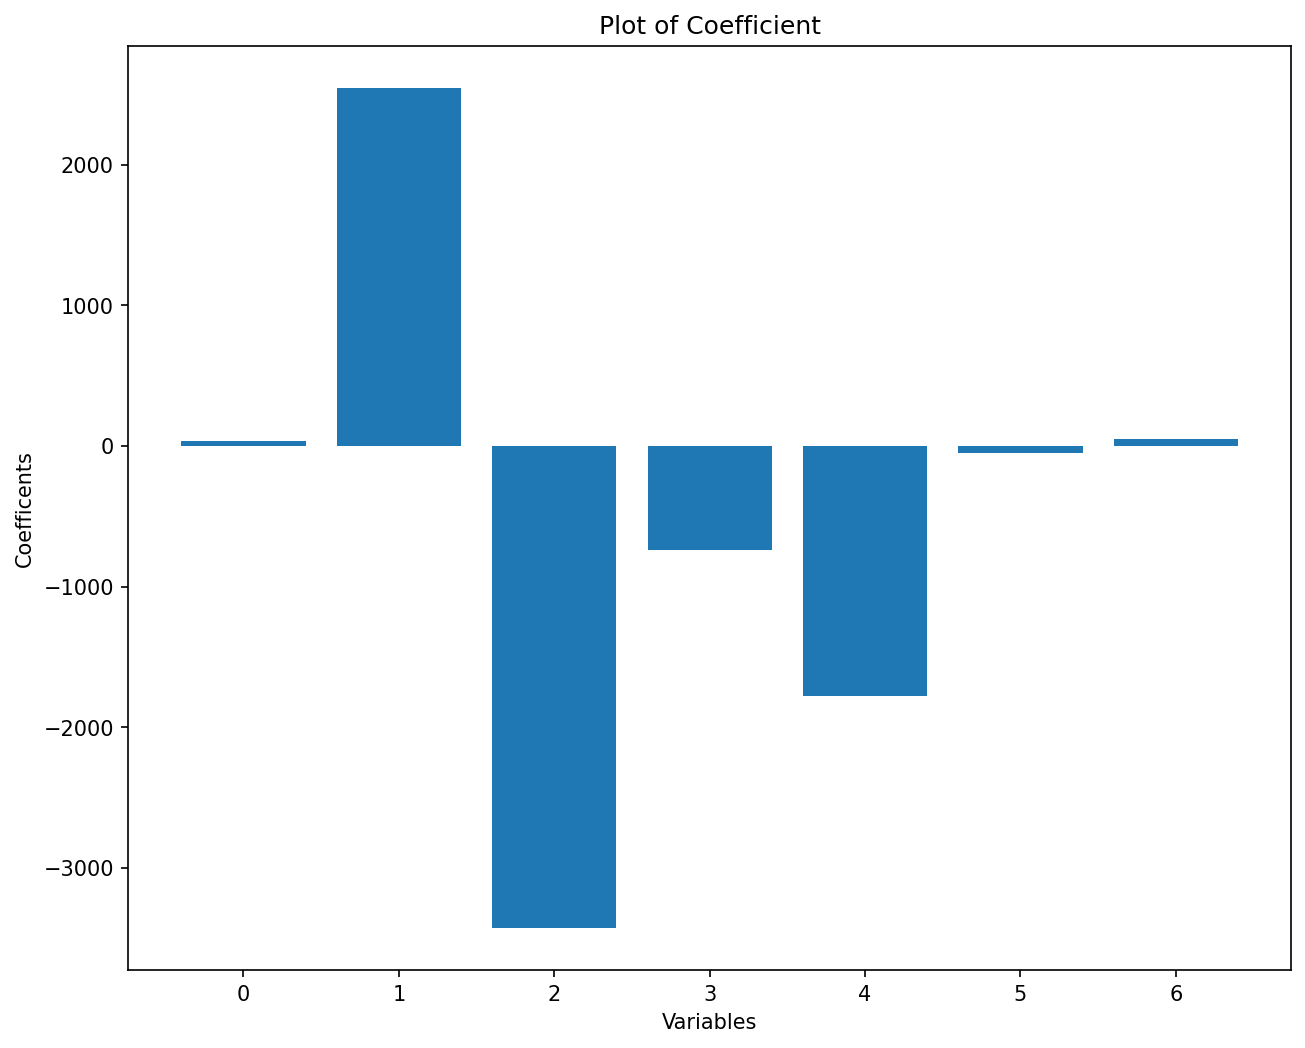

In [16]:
plt.figure(figsize=(10,8),dpi=150,facecolor="w",edgecolor="b")
x = range(len(x_train.columns))
y = LR.coef_
plt.bar(x,y)
plt.xlabel("Variables")
plt.ylabel("Coefficents")
plt.title("Plot of Coefficient")

In [15]:
# Calculate residual

Residual = pd.DataFrame({
    "fitted_values":y_test,
    "predicted_values":predict_test
})
Residual["residuals"]=Residual["fitted_values"]-Residual["predicted_values"]
Residual.head()

,fitted_values,predicted_values,residuals
329666,839,929.504310,-90.504310
27983,211,855.453648,-644.453648
103532,1280,1082.569446,197.430554
671270,522,1124.450036,-602.450036
143202,377,908.657071,-531.657071


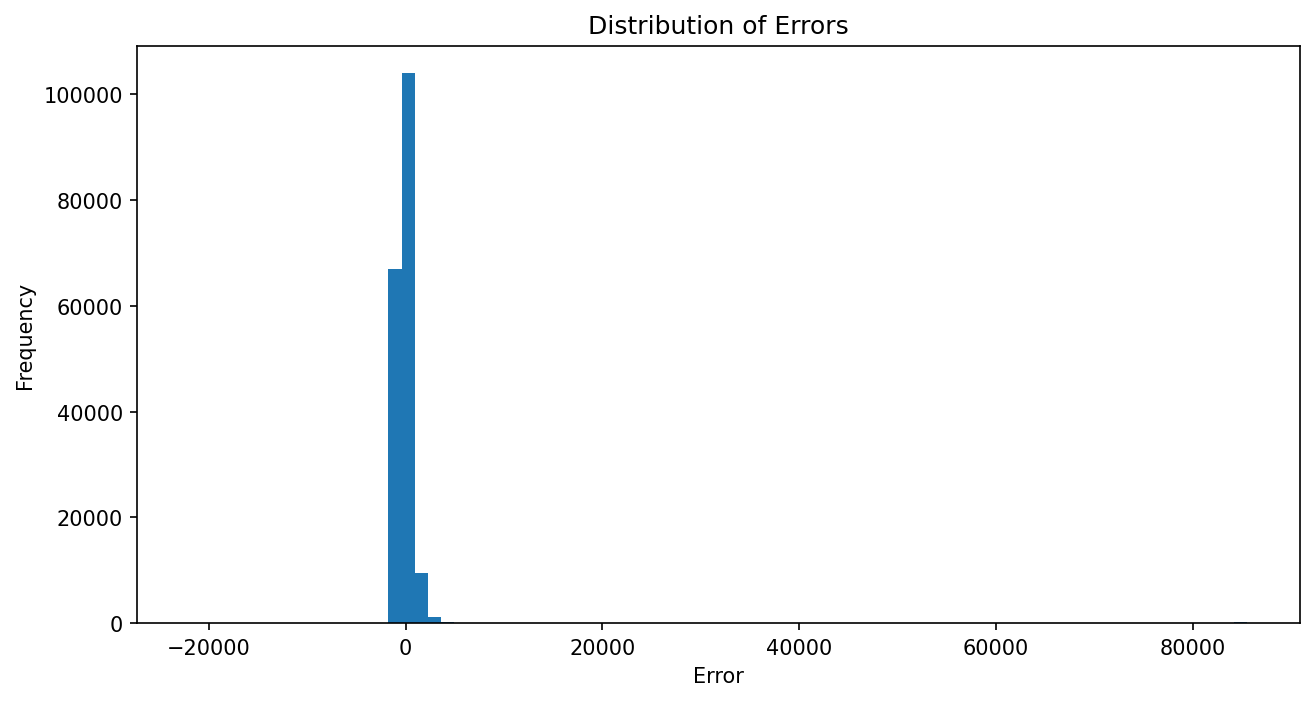

In [18]:
plt.figure(figsize=(10,5),dpi=150,facecolor="w",edgecolor="b")
plt.hist(Residual.residuals,bins=80)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Distribution of Errors")
plt.show()

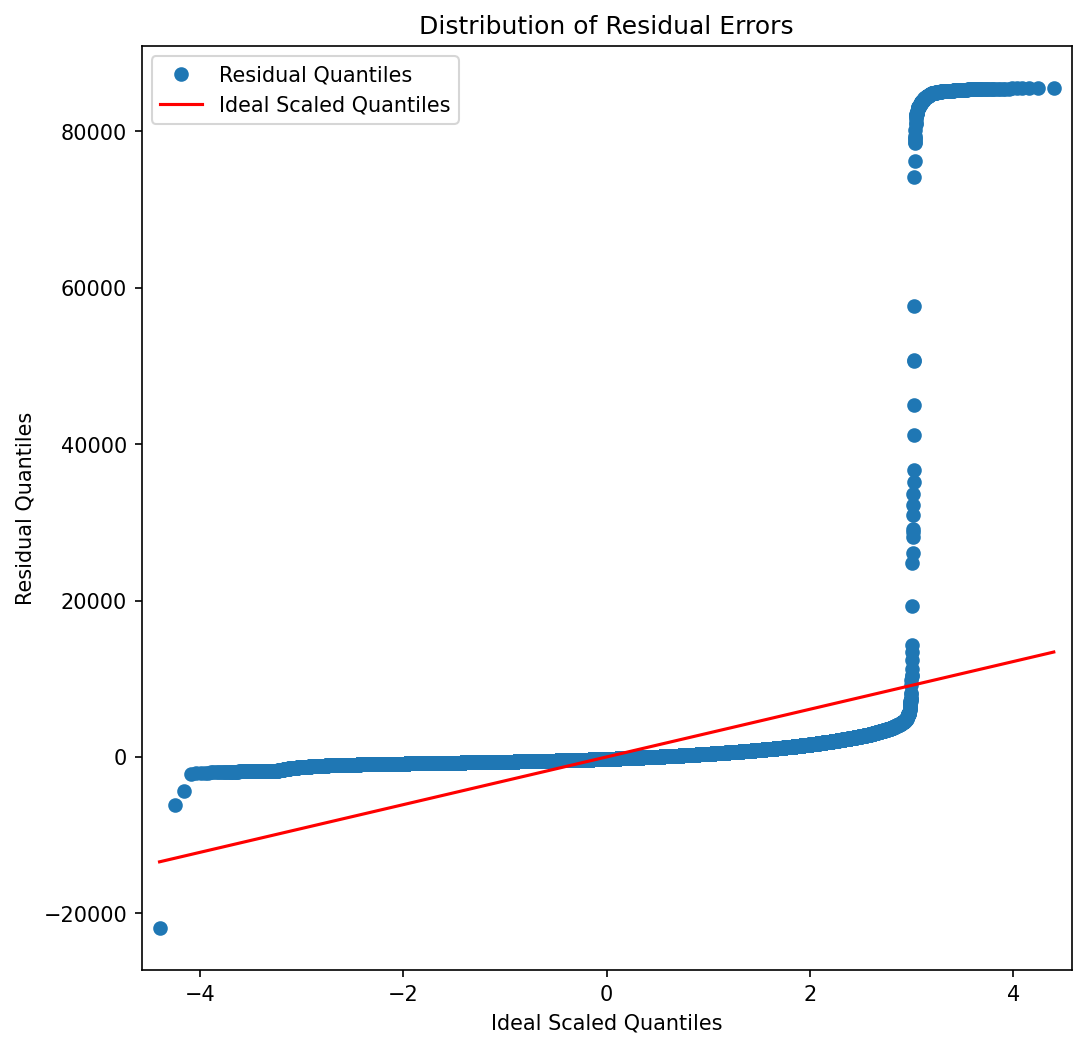

In [21]:
## Plot QQ plot to comapair Residual Quantiles and Ideal Scaled Quantiles

fig, ax = plt.subplots(figsize=(8,8) , dpi = 150)
qqplot(Residual.residuals, line = 's' , ax = ax)
plt.xlabel('Ideal Scaled Quantiles')
plt.ylabel('Residual Quantiles')
plt.legend(["Residual Quantiles","Ideal Scaled Quantiles"])
plt.title('Distribution of Residual Errors')
plt.show()

In [22]:
# compute the train score 

linear_train_score = LR.score(x_train,y_train)
linear_train_score*100

0.280083687001087

In [23]:
# compute the test score

linear_test_score = LR.score(x_test,y_test)
linear_test_score*100

0.5762881017061461

In [24]:
# For plotting the bar graph, we store the score of the train.

%store linear_train_score

Stored 'linear_train_score' (float64)


In [25]:
# For plotting the bar graph, we store the score of the test.

%store linear_test_score

Stored 'linear_test_score' (float64)


## conclusions
    1.The training and test RMSE has a huge difference .
    2.There are some negative coefficients as well, as we observed when computing them.
    3.The residual quantile line does not fit over all ideal scaled quantiles when plotted with the qqplot.
    4.The train and test score of linear model is very low.